In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten
import seaborn as sna
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df=pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.shape

(53940, 10)

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
cuts=df['cut'].unique()

In [11]:
cuts

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
le=LabelEncoder()

In [13]:
df['cut']=le.fit_transform(df['cut'])

In [14]:
df['cut'].head

<bound method NDFrame.head of 0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53940, dtype: int64>

In [15]:
cuts=df['cut'].unique()
cuts

array([2, 3, 1, 4, 0])

In [16]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [17]:
colors=df['color'].unique()
claritys=df['clarity'].unique()
print(colors)
print('_____________________________________________________________')
print(claritys)

['E' 'I' 'J' 'H' 'F' 'G' 'D']
_____________________________________________________________
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [18]:
df['color']=le.fit_transform(df['color'])
df['clarity']=le.fit_transform(df['clarity'])

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [20]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
scale=StandardScaler()


In [22]:
X=df.drop(columns='price',axis=1)
Y=df['price']

In [23]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [24]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [25]:
X=scale.fit_transform(X)

In [26]:
X

array([[-1.19816781, -0.53809897, -0.93716275, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129,  0.43494935, -0.93716275, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -1.51114729, -0.93716275, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095,  1.40799767, -1.52502147, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691,  0.43494935,  0.8264134 , ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725, -0.53809897, -1.52502147, ...,  0.08811478,
         0.11861587,  0.14349912]])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3,shuffle=True,random_state=2)

In [28]:
X_test,x_val,Y_test,y_val=train_test_split(x_test,y_test,test_size=.1)

In [29]:
print(x_train.shape)
print(X_test.shape)
print(x_val.shape)
print(y_train.shape)
print(Y_test.shape)
print(y_val.shape)

(37758, 9)
(14563, 9)
(1619, 9)
(37758,)
(14563,)
(1619,)


In [30]:
model=keras.Sequential([
    Dense(64,activation='relu',input_shape=(9,)),
    Dense(64,activation='relu',input_shape=(9,)),
    Dense(1)
])

In [31]:
optmizer=tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optmizer,loss='mean_squared_error',metrics=['mean_squared_error'])

In [32]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val),batch_size=500,verbose=2)

Epoch 1/20
76/76 - 1s - loss: 31395542.0000 - mean_squared_error: 31395542.0000 - val_loss: 30747390.0000 - val_mean_squared_error: 30747390.0000 - 1s/epoch - 16ms/step
Epoch 2/20
76/76 - 0s - loss: 30897154.0000 - mean_squared_error: 30897154.0000 - val_loss: 29941466.0000 - val_mean_squared_error: 29941466.0000 - 236ms/epoch - 3ms/step
Epoch 3/20
76/76 - 0s - loss: 29738116.0000 - mean_squared_error: 29738116.0000 - val_loss: 28347030.0000 - val_mean_squared_error: 28347030.0000 - 241ms/epoch - 3ms/step
Epoch 4/20
76/76 - 0s - loss: 27692416.0000 - mean_squared_error: 27692416.0000 - val_loss: 25793158.0000 - val_mean_squared_error: 25793158.0000 - 235ms/epoch - 3ms/step
Epoch 5/20
76/76 - 0s - loss: 24691520.0000 - mean_squared_error: 24691520.0000 - val_loss: 22241172.0000 - val_mean_squared_error: 22241172.0000 - 228ms/epoch - 3ms/step
Epoch 6/20
76/76 - 0s - loss: 20760936.0000 - mean_squared_error: 20760936.0000 - val_loss: 17878690.0000 - val_mean_squared_error: 17878690.0000 -

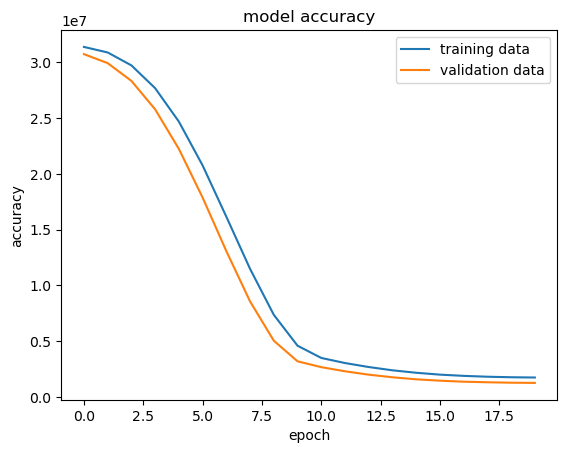

In [33]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

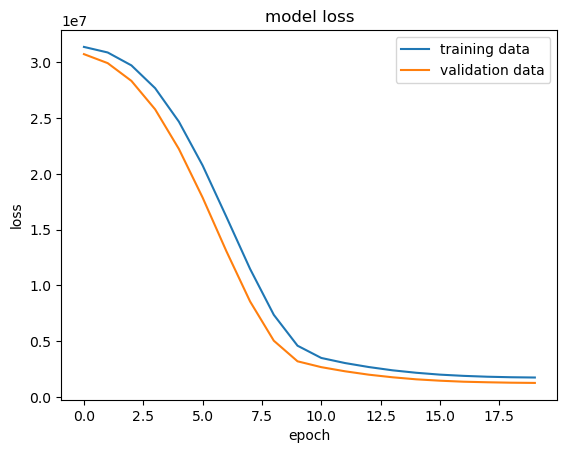

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [35]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

456/456 [==============================] - 1s 1ms/step - loss: 1471798.5000 - mean_squared_error: 1471798.5000


In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [37]:
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
predicted = reg.predict(X_test)

In [39]:
predicted

array([ 345.22059392, 3379.64861643, 5325.5137493 , ...,  342.90429815,
        375.73440908,  280.50549124])

In [40]:
print('R^2 score: ',reg.score(x_train,y_train))

R^2 score:  0.8854971117583922
